In [1]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup
import sys


def getTitle(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        print(e)
        return None
    try:
        bsObj = BeautifulSoup(html, "html.parser")
        title = bsObj.body.h1
    except AttributeError as e:
        return None
    return title.text

In [2]:
getTitle("https://karenyyyme.herokuapp.com/")

"Karenyyy's Personal Site"

In [3]:
s={""}
for i in range(1,7):
    html = urlopen("https://karenyyyme.herokuapp.com/?page={}".format(i))
    bsObj = BeautifulSoup(html, "html.parser")
    nameList = bsObj.findAll("span", {"class":"post-category"})
    for name in nameList:
        s = s | {name.text}
[i.strip() for i in s if i !='']

['git',
 'web development',
 'spark_scala',
 'nvidia driver',
 'pytorch',
 'basic machine learning',
 'CV']

try scraping other's code:

In [11]:
html = urlopen("http://blog.csdn.net/ZengDong_1991/article/details/51491606")
bsObj = BeautifulSoup(html, "html.parser")
all_code = bsObj.findAll("pre", {"class": "prettyprint"})
for i in range(len(all_code)):
    print(all_code[i].get_text())

#include <stdio.h>
#include <cv.h>
#include <highgui.h>

CvHaarClassifierCascade *cascade;
CvMemStorage            *storage;

void detect(IplImage *img);

int main(int argc, char** argv)
{
    CvCapture *capture;
    IplImage  *frame;
    int input_resize_percent = 100;

    cascade = (CvHaarClassifierCascade*)cvLoad("cars3.xml", 0, 0, 0);
    storage = cvCreateMemStorage(0);
    capture = cvCaptureFromAVI("video1.avi");

    assert(cascade && storage && capture);

    cvNamedWindow("video", 1);

    const int KEY_SPACE = 32;
    const int KEY_ESC = 27;

    int key = 0;
    do
    {
        frame = cvQueryFrame(capture);

        if (!frame)
            break;

        //   cvResize(frame1, frame);

        detect(frame);

        key = cvWaitKey(10);

        if (key == KEY_SPACE)
            key = cvWaitKey(0);

        if (key == KEY_ESC)
            break;

    } while (1);

    cvDestroyAllWindows();
    cvReleaseImage(&frame);
    cvReleaseCapture(&capture);
    cvReleaseHaarCla

find children:
    - example: find all tables in one post:

In [15]:
html = urlopen("https://karenyyyme.herokuapp.com/post/76/")
bsObj = BeautifulSoup(html, "html.parser")

for i in bsObj.find_all("table",{"class":"dataframe"}):
    for j in i.children:
        print(j)



<thead>
<tr style="text-align: right;">
<th></th>
<th>method</th>
<th>number</th>
<th>orbital_period</th>
<th>mass</th>
<th>distance</th>
<th>year</th>
</tr>
</thead>


<tbody>
<tr>
<th>0</th>
<td>Radial Velocity</td>
<td>1</td>
<td>269.300</td>
<td>7.10</td>
<td>77.40</td>
<td>2006</td>
</tr>
<tr>
<th>1</th>
<td>Radial Velocity</td>
<td>1</td>
<td>874.774</td>
<td>2.21</td>
<td>56.95</td>
<td>2008</td>
</tr>
<tr>
<th>2</th>
<td>Radial Velocity</td>
<td>1</td>
<td>763.000</td>
<td>2.60</td>
<td>19.84</td>
<td>2011</td>
</tr>
<tr>
<th>3</th>
<td>Radial Velocity</td>
<td>1</td>
<td>326.030</td>
<td>19.40</td>
<td>110.62</td>
<td>2007</td>
</tr>
<tr>
<th>4</th>
<td>Radial Velocity</td>
<td>1</td>
<td>516.220</td>
<td>10.50</td>
<td>119.47</td>
<td>2009</td>
</tr>
</tbody>




<thead>
<tr style="text-align: right;">
<th></th>
<th>number</th>
<th>orbital_period</th>
<th>mass</th>
<th>distance</th>
<th>year</th>
</tr>
</thead>


<tbody>
<tr>
<th>count</th>
<td>498.00000</td>
<td>498.000000

In [23]:
for i in bsObj.find_all("table",{"class":"dataframe"}):
    for j in i.tr.next_siblings:
        print(j) 







<tr>
<th>method</th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
</tr>






<tr>
<th></th>
<th>min</th>
<th>median</th>
<th>max</th>
<th>min</th>
<th>median</th>
<th>max</th>
</tr>


<tr>
<th>key</th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
</tr>




<tr>
<th>key</th>
<th></th>
<th></th>
</tr>










<tr>
<th>key</th>
<th></th>
<th></th>
</tr>












<tr>
<th>method</th>
<th></th>
<th></th>
<th></th>
<th></th>
</tr>




<tr>
<th>method</th>
<th></th>
<th></th>
<th></th>
<th></th>
</tr>




<tr>
<th>method</th>
<th></th>
<th></th>
<th></th>
<th></th>
</tr>






<tr>
<th>sex</th>
<th></th>
</tr>




<tr>
<th>sex</th>
<th></th>
<th></th>
<th></th>
</tr>




<tr>
<th>sex</th>
<th></th>
<th></th>
<th></th>
</tr>




<tr>
<th>sex</th>
<th>age</th>
<th></th>
<th></th>
<th></th>
</tr>




<tr>
<th></th>
<th>class</th>
<th>First</th>
<th>Second</th>
<th>Third</th>
<th>First</th>
<th>Second</th>
<th>Third</th>
<th>First</th>

find all my images in one post:

In [25]:
import re
html = urlopen("https://karenyyyme.herokuapp.com/post/80/")
bsObj = BeautifulSoup(html, "html.parser")
images = bsObj.findAll("img", {"src":re.compile(".*\.png")})
for image in images: 
    print(image["src"])

https://raw.githubusercontent.com/karenyyy/data_science/master/py_datasci/images2/output_2_0.png
https://raw.githubusercontent.com/karenyyy/data_science/master/py_datasci/images2/output_4_0.png
https://raw.githubusercontent.com/karenyyy/data_science/master/py_datasci/images2/output_7_0.png
https://raw.githubusercontent.com/karenyyy/data_science/master/py_datasci/images2/output_11_0.png
https://raw.githubusercontent.com/karenyyy/data_science/master/py_datasci/images2/output_16_0.png
https://raw.githubusercontent.com/karenyyy/data_science/master/py_datasci/images2/output_18_0.png
https://raw.githubusercontent.com/karenyyy/data_science/master/py_datasci/images2/output_22_0.png
https://raw.githubusercontent.com/karenyyy/data_science/master/py_datasci/images2/output_24_0.png
https://raw.githubusercontent.com/karenyyy/data_science/master/py_datasci/images2/output_28_0.png
https://raw.githubusercontent.com/karenyyy/data_science/master/py_datasci/images2/output_30_0.png
https://raw.githubuserc

lambda expressions:

In [28]:
tags = bsObj.findAll(lambda tag: len(tag.attrs) == 2)
for tag in tags:
    print(tag)

<meta content="width=device-width, initial-scale=1" name="viewport">
<!-- css -->
<link href="http://code.ionicframework.com/ionicons/2.0.1/css/ionicons.min.css" rel="stylesheet">
<link href="https://fonts.googleapis.com/css?family=Permanent+Marker" rel="stylesheet" type="text/css">
<link href="https://fonts.googleapis.com/css?family=Raleway:100,600" rel="stylesheet" type="text/css">
<link href="https://fonts.googleapis.com/css?family=Ubuntu+Mono" rel="stylesheet">
<link href="/static/blog/css/bootstrap.min.css" rel="stylesheet">
<link href="/static/blog/css/pace.css" rel="stylesheet">
<link href="/static/blog/css/custom.css" rel="stylesheet">
<link href="/static/blog/css/highlights/github.css" rel="stylesheet">
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.6/css/bootstrap.min.css" rel="stylesheet">
<link href="//cdnjs.cloudflare.com/ajax/libs/highlight.js/9.11.0/styles/default.min.css" rel="stylesheet">
<style>
        span.highlighted {
            color: red;
        }



wikipedia scraping:

In [33]:
import random, datetime
random.seed(datetime.datetime.now())

def getLinks(articleUrl):
    html = urlopen("http://en.wikipedia.org"+articleUrl)
    bsObj = BeautifulSoup(html, "html.parser")
    return bsObj.find("div", {"id":"bodyContent"}).findAll("a", href=re.compile("^(/wiki/)((?!:).)*$"))
links = getLinks("/wiki/Kevin_Bacon")
i=0
while len(links) > 0:
    i+=1
    if i==20:
        break
    newArticle = links[random.randint(0, len(links)-1)].attrs["href"]
    print(newArticle)
    links = getLinks(newArticle)

/wiki/Diner_(film)
/wiki/Jerry_Weintraub
/wiki/The_Newton_Boys
/wiki/Train_robbery
/wiki/Payroll
/wiki/Equal_opportunity
/wiki/Brazil
/wiki/Class_discrimination
/wiki/South_End_Press
/wiki/Brooklyn
/wiki/Columbia_County,_New_York
/wiki/Province_of_New_York
/wiki/Tuscarora_(tribe)
/wiki/Loyalist_(American_Revolution)
/wiki/Andrew_Allen_(Pennsylvania)
/wiki/Library_of_Congress_Control_Number
/wiki/Library_catalog
/wiki/WorldCat
/wiki/IP_address


In [35]:
pages = set()
def getLinks(pageUrl):
    global pages
    html = urlopen("http://en.wikipedia.org"+pageUrl)
    bsObj = BeautifulSoup(html, "html.parser")
    try:
        print(bsObj.h1.get_text())
        print(bsObj.find(id ="mw-content-text").findAll("p")[0])
        print(bsObj.find(id="ca-edit").find("span").find("a").attrs['href'])
    except AttributeError:
        print("This page is missing something! No worries though!")
    
    for link in bsObj.findAll("a", href=re.compile("^(/wiki/)")):
        if 'href' in link.attrs:
            if link.attrs['href'] not in pages:
                #We have encountered a new page
                newPage = link.attrs['href']
                print("----------------\n"+newPage)
                pages.add(newPage)
                getLinks(newPage)
getLinks("") 

Main Page
<p><b><a href="/wiki/Grand_Duchess_Olga_Alexandrovna_of_Russia" title="Grand Duchess Olga Alexandrovna of Russia">Grand Duchess Olga Alexandrovna of Russia</a></b> (1882–1960) was the youngest child of Emperor <a href="/wiki/Alexander_III_of_Russia" title="Alexander III of Russia">Alexander III of Russia</a> and younger sister of Emperor <a class="mw-redirect" href="/wiki/Nicholas_II" title="Nicholas II">Nicholas II</a>. Her father died when she was 12, and her brother Nicholas became emperor. At 19 she married <a href="/wiki/Duke_Peter_Alexandrovich_of_Oldenburg" title="Duke Peter Alexandrovich of Oldenburg">Duke Peter Alexandrovich of Oldenburg</a>; their marriage was unconsummated and was annulled by the Emperor in October 1916. The following month Olga married cavalry officer <a href="/wiki/Nikolai_Kulikovsky" title="Nikolai Kulikovsky">Nikolai Kulikovsky</a>, with whom she had fallen in love several years before. During the First World War, the Grand Duchess served as an

Wikipedia:Requests for permissions
<p><span class="sysop-show" id="coordinates"><a href="/wiki/Wikipedia:Requests_for_permissions/Administrator_instructions" title="Wikipedia:Requests for permissions/Administrator instructions">Administrator instructions</a></span></p>
This page is missing something! No worries though!
----------------
/wiki/Wikipedia:Requesting_copyright_permission
Wikipedia:Requesting copyright permission
<p>To use copyrighted material on Wikipedia, it is <i>not enough</i> that we have permission to use it on Wikipedia alone. That's because Wikipedia itself states all its material may be used by anyone, for any purpose. So we have to be sure all material is in fact licensed for that purpose, whoever provided it.</p>
This page is missing something! No worries though!
----------------
/wiki/Wikipedia:User_access_levels
Wikipedia:User access levels
<p>The <b>user access level</b> of an editor affects their ability to perform certain actions on Wikipedia; it depends on w

Wikipedia:Shortcut
<p>A <b>shortcut</b> is a specialized type of <a href="/wiki/Wikipedia:Redirect" title="Wikipedia:Redirect">redirect page</a> that provides an abbreviated <a class="mw-redirect" href="/wiki/Wikilink" title="Wikilink">wikilink</a> to a project page or one of its sections, usually from the <b><a href="/wiki/Wikipedia:Project_namespace" title="Wikipedia:Project namespace">Wikipedia namespace</a></b> and <b><a href="/wiki/Wikipedia:Help_namespace" title="Wikipedia:Help namespace">Help namespace</a></b>. They are commonly used on community pages and talk pages, but should not be used in articles themselves. If there is a shortcut for a page or section, it is usually displayed in an information box labelled <i>Shortcuts:</i>, as can be seen at the top of this page.</p>
This page is missing something! No worries though!
----------------
/wiki/Wikipedia:Keyboard_shortcuts
Wikipedia:Keyboard shortcuts
<p>The <a href="/wiki/MediaWiki" title="MediaWiki">MediaWiki</a> software c

Wikipedia:Ignore all rules
<p>If a <a href="/wiki/Wikipedia:Policies_and_guidelines" title="Wikipedia:Policies and guidelines">rule</a> prevents you from improving or maintaining <a href="/wiki/Wikipedia" title="Wikipedia">Wikipedia</a>, <b>ignore it</b>.</p>
/w/index.php?title=Wikipedia:Ignore_all_rules&action=edit
----------------
/wiki/Wikipedia:Protection_policy#pc1
Wikipedia:Protection policy
<p>Wikipedia is built around the principle that <a href="/wiki/Wiki" title="Wiki">anyone can edit it</a>, and it therefore aims to have as many of its pages as possible open for public editing so that anyone can add material and correct errors. However, in some particular circumstances, because of a specifically identified likelihood of damage resulting if editing is left open, some individual pages may need to be subject to technical restrictions (often only temporary but sometimes indefinitely) on who is permitted to modify them. The placing of such restrictions on pages is called <b>protec

IndexError: list index out of range

> How does 'os.sep' works?

__os.sep = '/'__

In [4]:
from os import sep
link="https://media.giphy.com/media/piKXr2hEDsO1G/giphy.gif"
link.strip(sep).rsplit(sep, 1)[-1]

'/'

### scrape anime pics

In [2]:
import requests
import os
import traceback

def download(url, filename):
    if os.path.exists(filename):
        print('file already exists!')
        return
    try:
        r = requests.get(url, stream=True, timeout=60)
        r.raise_for_status()
        with open(filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=256):
                if chunk:  # filter out keep-alive new chunks
                    f.write(chunk)
                    f.flush()
        return filename
    except KeyboardInterrupt:
        if os.path.exists(filename):
            os.remove(filename)
        raise KeyboardInterrupt
    except Exception:
        traceback.print_exc()
        if os.path.exists(filename):
            os.remove(filename)


In [3]:
if os.path.exists('imgs') is False:
    os.makedirs('imgs')

start = 1
end = 10 # simply take 10 pages as example
for i in range(start, end + 1):
    url = 'http://konachan.net/post?page=%d&tags=' % i
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    for img in soup.find_all('img', class_="preview"):
        target_url = 'http:' + img['src']
        filename = os.path.join('imgs', target_url.split('/')[-1])
        download(target_url, filename)
    print('%d / %d' % (i, end))

file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
1 / 10
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
2 / 10
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!
file already exists!

### extract faces

In [4]:
import cv2
import sys
import os.path
from glob import glob

def detect(filename, cascade_file="lbpcascade_animeface.xml"):
    if not os.path.isfile(cascade_file):
        raise RuntimeError("%s: not found" % cascade_file)

    cascade = cv2.CascadeClassifier(cascade_file)
    image = cv2.imread(filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)

    faces = cascade.detectMultiScale(gray,
                                     # detector options
                                     scaleFactor=1.1,
                                     minNeighbors=5,
                                     minSize=(48, 48))
    for i, (x, y, w, h) in enumerate(faces):
        face = image[y: y + h, x:x + w, :]
        face = cv2.resize(face, (96, 96))
        save_filename = '%s-%d.jpg' % (os.path.basename(filename).split('.')[0], i)
        cv2.imwrite("faces/" + save_filename, face)

In [6]:
if os.path.exists('faces') is False:
    os.makedirs('faces')
file_list = glob('imgs/*.jpg')
for filename in file_list:
    detect(filename)

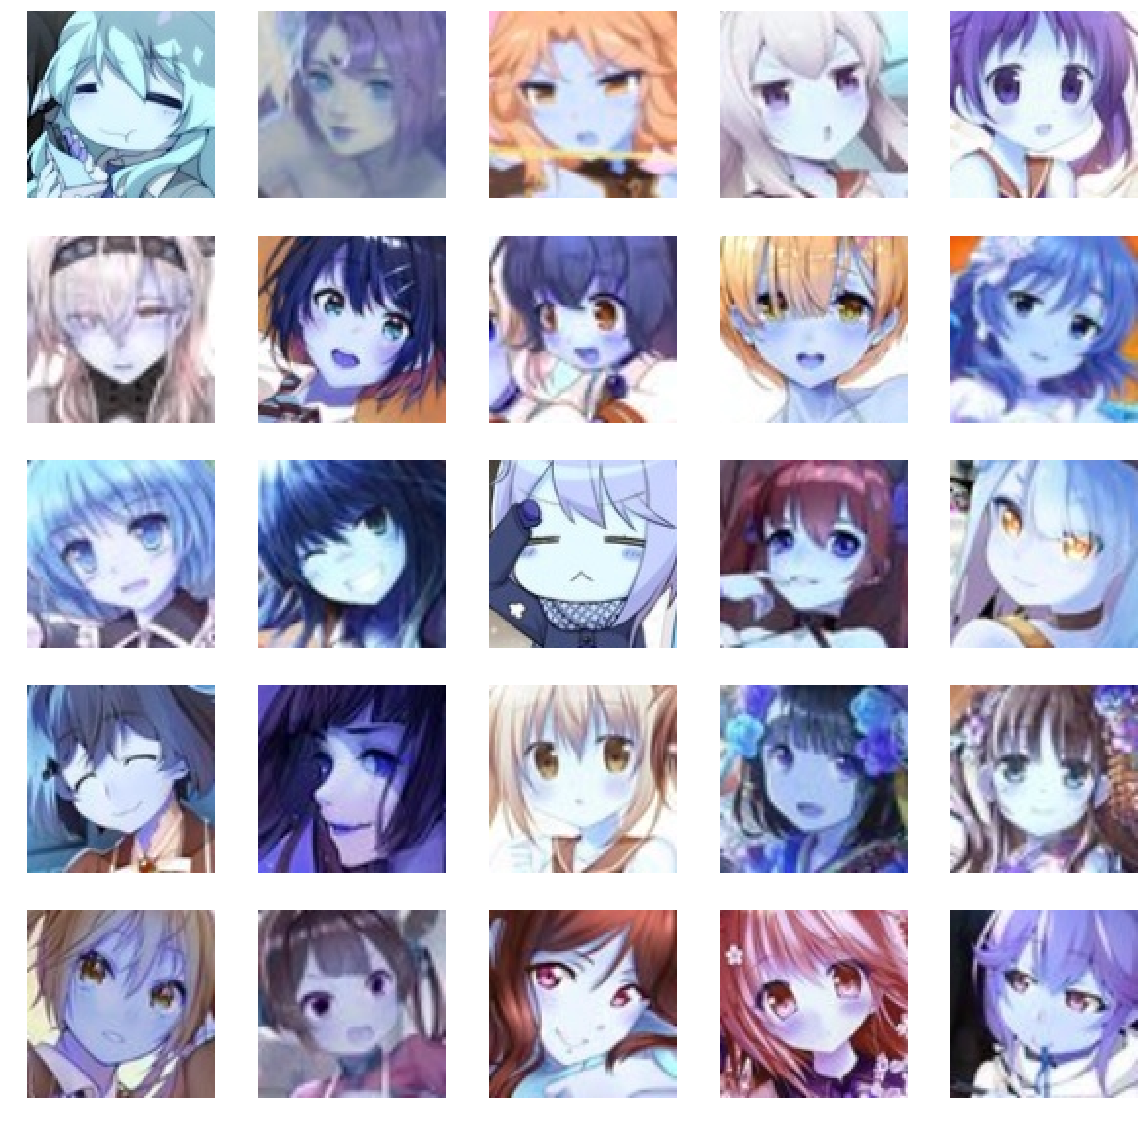

In [28]:
face_list = glob('faces/*.jpg')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,20)
fig=plt.figure()
j=1
list=[]
while j<=25:
    i=np.random.randint(len(face_list))
    if i not in list:
        list.append(i)
    else:
        continue
    img=cv2.imread(face_list[i])
    fig.add_subplot(5,5,j)
    plt.imshow(img)
    plt.axis("off")
    j+=1